# Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import larch
from larch import Group
from larch.xafs import pre_edge
import larch.io

In [3]:
plt.rcParams.update({'font.size': 16})
%matplotlib ipympl

# Import Experimental Data

In [4]:
#Data is from: "https://xaslib.xrayabsorption.org/elem/Fe"

In [5]:
# Set directory with data
data_dir = r'C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data'
file_name = '\FeS2_rt_01.xdi'

In [6]:
# Import a given file and create a Larch group
dat = larch.io.read_xdi(data_dir+file_name)

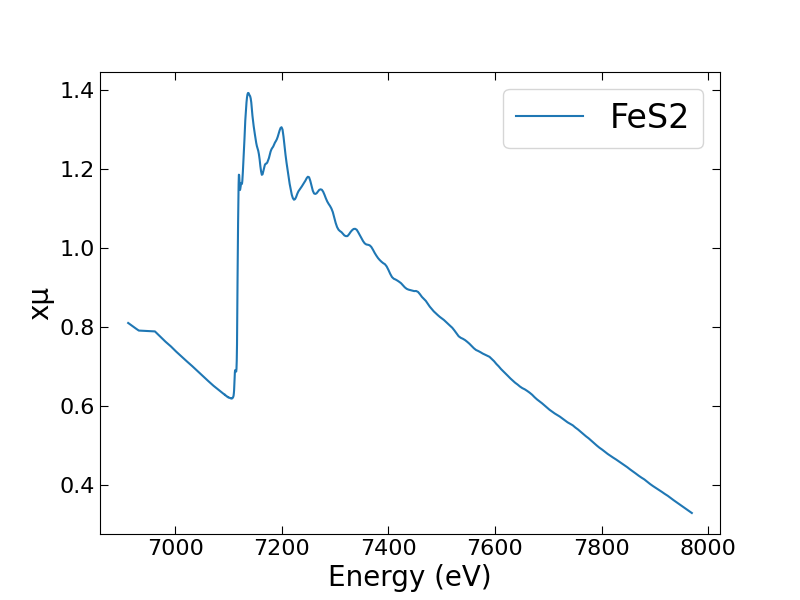

In [7]:
# Plot XAFS data
plt.figure(figsize=(8, 6))

x = dat.energy
y = dat.mutrans
plt.plot(x, y, label='FeS2')

plt.legend(loc='upper right', ncol=1, prop={'size': 24})
plt.xlabel('Energy (eV)', size=20)
plt.ylabel('x\u03BC', size=20)
plt.tick_params(direction='in', top='True', right ='True', length=6)

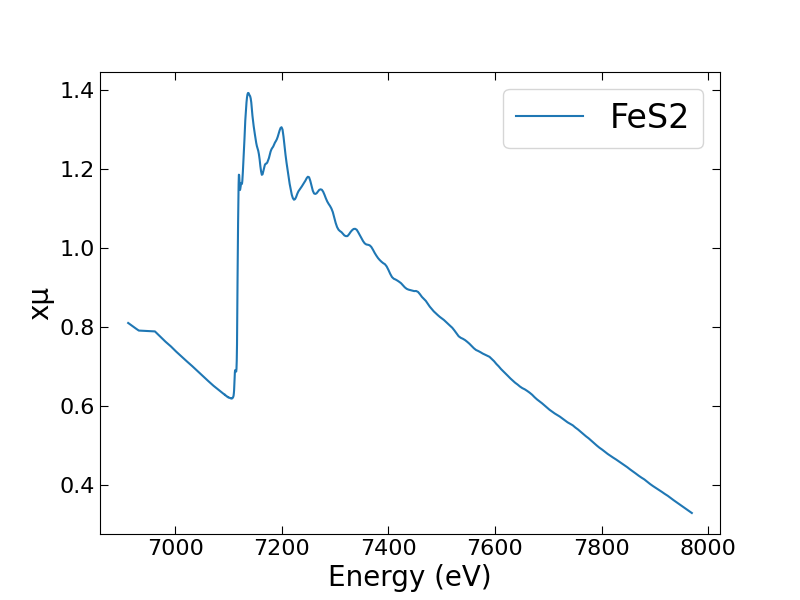

In [8]:
# plt.savefig('./Figures/filename.svg')
plt.show()

In [9]:
# Normalize spectrum and save relevant info to the data's group
pre_edge(dat.energy, dat.mutrans, group=dat, pre1=-150, pre2=-30, norm1=150, norm2=750, nnorm=2)

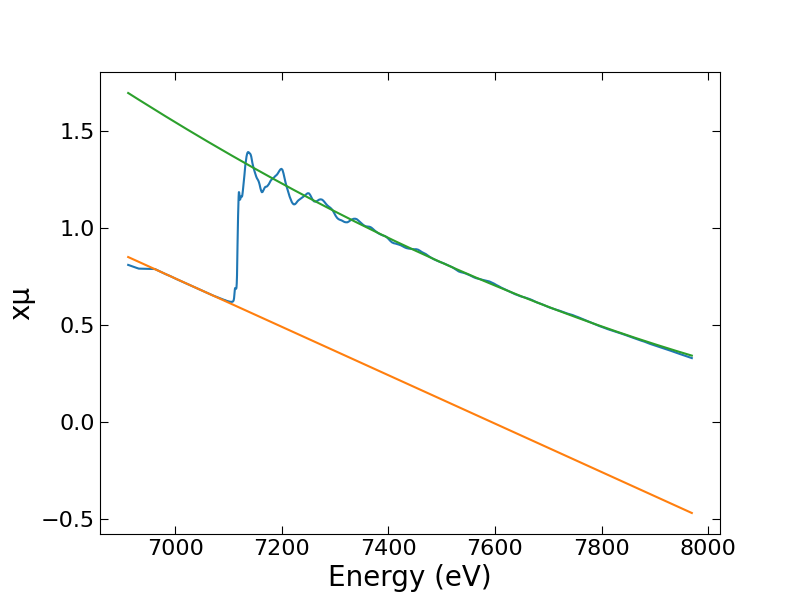

In [10]:
# Plot raw data with pre- and post-edge lines
plt.figure(figsize=(8, 6))
plt.plot(dat.energy, dat.mutrans)
plt.plot(dat.energy, dat.pre_edge)
plt.plot(dat.energy, dat.post_edge)

plt.xlabel('Energy (eV)', size=20)
plt.ylabel('x\u03BC', size=20)
plt.tick_params(direction='in', top='True', right ='True', length=6)
plt.show()

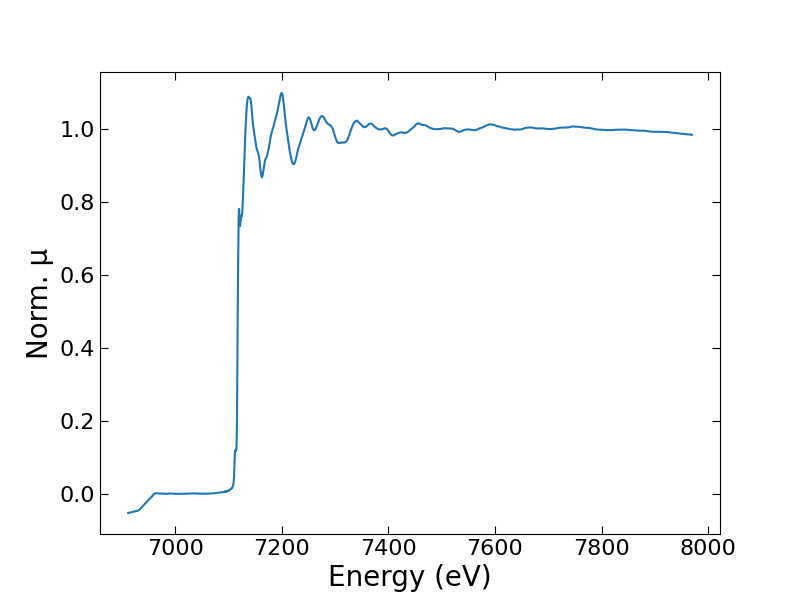

In [11]:
# Check flattened spectrum
plt.figure(figsize=(8, 6))
plt.plot(dat.energy, dat.flat)

plt.xlabel('Energy (eV)', size=20)
plt.ylabel('Norm. \u03BC', size=20)
plt.tick_params(direction='in', top='True', right ='True', length=6)
plt.show()

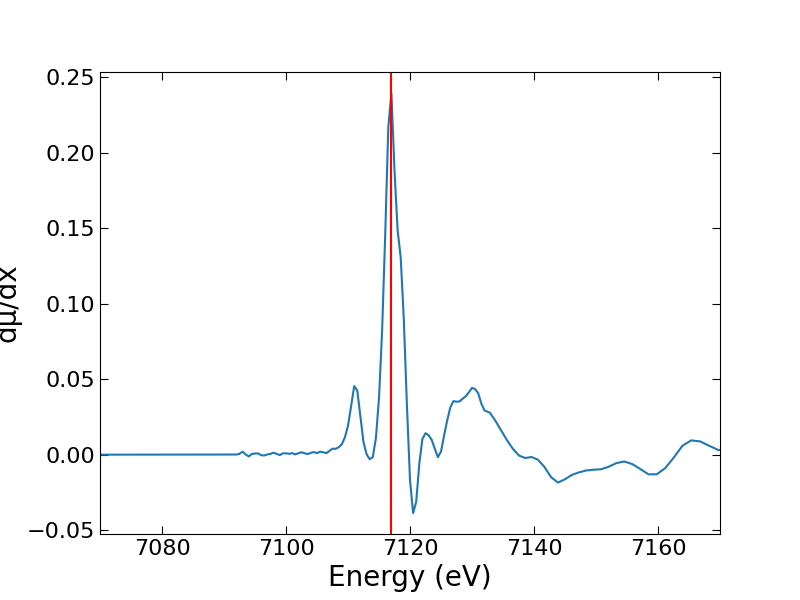

In [12]:
# Check where e0 was set by Larch, if you don't like it, set a given e0 value in the pre_edge function inputs.
plt.figure(figsize=(8, 6))
plt.plot(dat.energy, dat.dmude)
plt.axvline(dat.e0, color='r')
plt.xlim(7070, 7170)

plt.xlabel('Energy (eV)', size=20)
plt.ylabel('d\u03BC/dx', size=20)
plt.tick_params(direction='in', top='True', right ='True', length=6)
plt.show()

In [15]:
#See what files are in a directory and save the list
print(os.listdir(data_dir))
samples = os.listdir(data_dir)

['Fe2O3_rt_01.xdi', 'Fe3O4_rt_01.xdi', 'FeN_rt_01.xdi', 'FeO_rt_01.xdi', 'FeS2_rt_01.xdi', 'Fe_metal_rt_01.xdi']


In [33]:
#Create a list of Larch groups
grp_list = []
for sample in samples:
    join = os.path.join(data_dir,sample)
    print(join)
    grp_list.append([sample, larch.io.read_xdi(join)])
print(grp_list)

C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\Fe2O3_rt_01.xdi
C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\Fe3O4_rt_01.xdi
C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\FeN_rt_01.xdi
C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\FeO_rt_01.xdi
C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\FeS2_rt_01.xdi
C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\Fe_metal_rt_01.xdi
[['Fe2O3_rt_01.xdi', <Group XDI file C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\

In [66]:
# Normalize each spectrum
for i, spec in enumerate(grp_list):
    print(i)
    print(spec)
    print(grp_list)
    pre_edge(spec[1].energy, spec[1].mutrans, group=spec[1], pre1=-150, pre2=-30, norm1=125, norm2=800, nnorm=2)

0
['Fe2O3_rt_01.xdi', <Group XDI file C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\Fe2O3_rt_01.xdi>]
[['Fe2O3_rt_01.xdi', <Group XDI file C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\Fe2O3_rt_01.xdi>], ['Fe3O4_rt_01.xdi', <Group XDI file C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\Fe3O4_rt_01.xdi>], ['FeN_rt_01.xdi', <Group XDI file C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\FeN_rt_01.xdi>], ['FeO_rt_01.xdi', <Group XDI file C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Documents\EXAFS ANALYSIS\PNNL_PySpecNotebooks_Share\Data\Fe_Data\FeO_rt_01.xdi>], ['FeS2_rt_01.xdi', <Group XDI file C:\Users\jmoncadav\OneDrive - Brookhaven National Laboratory\Docum

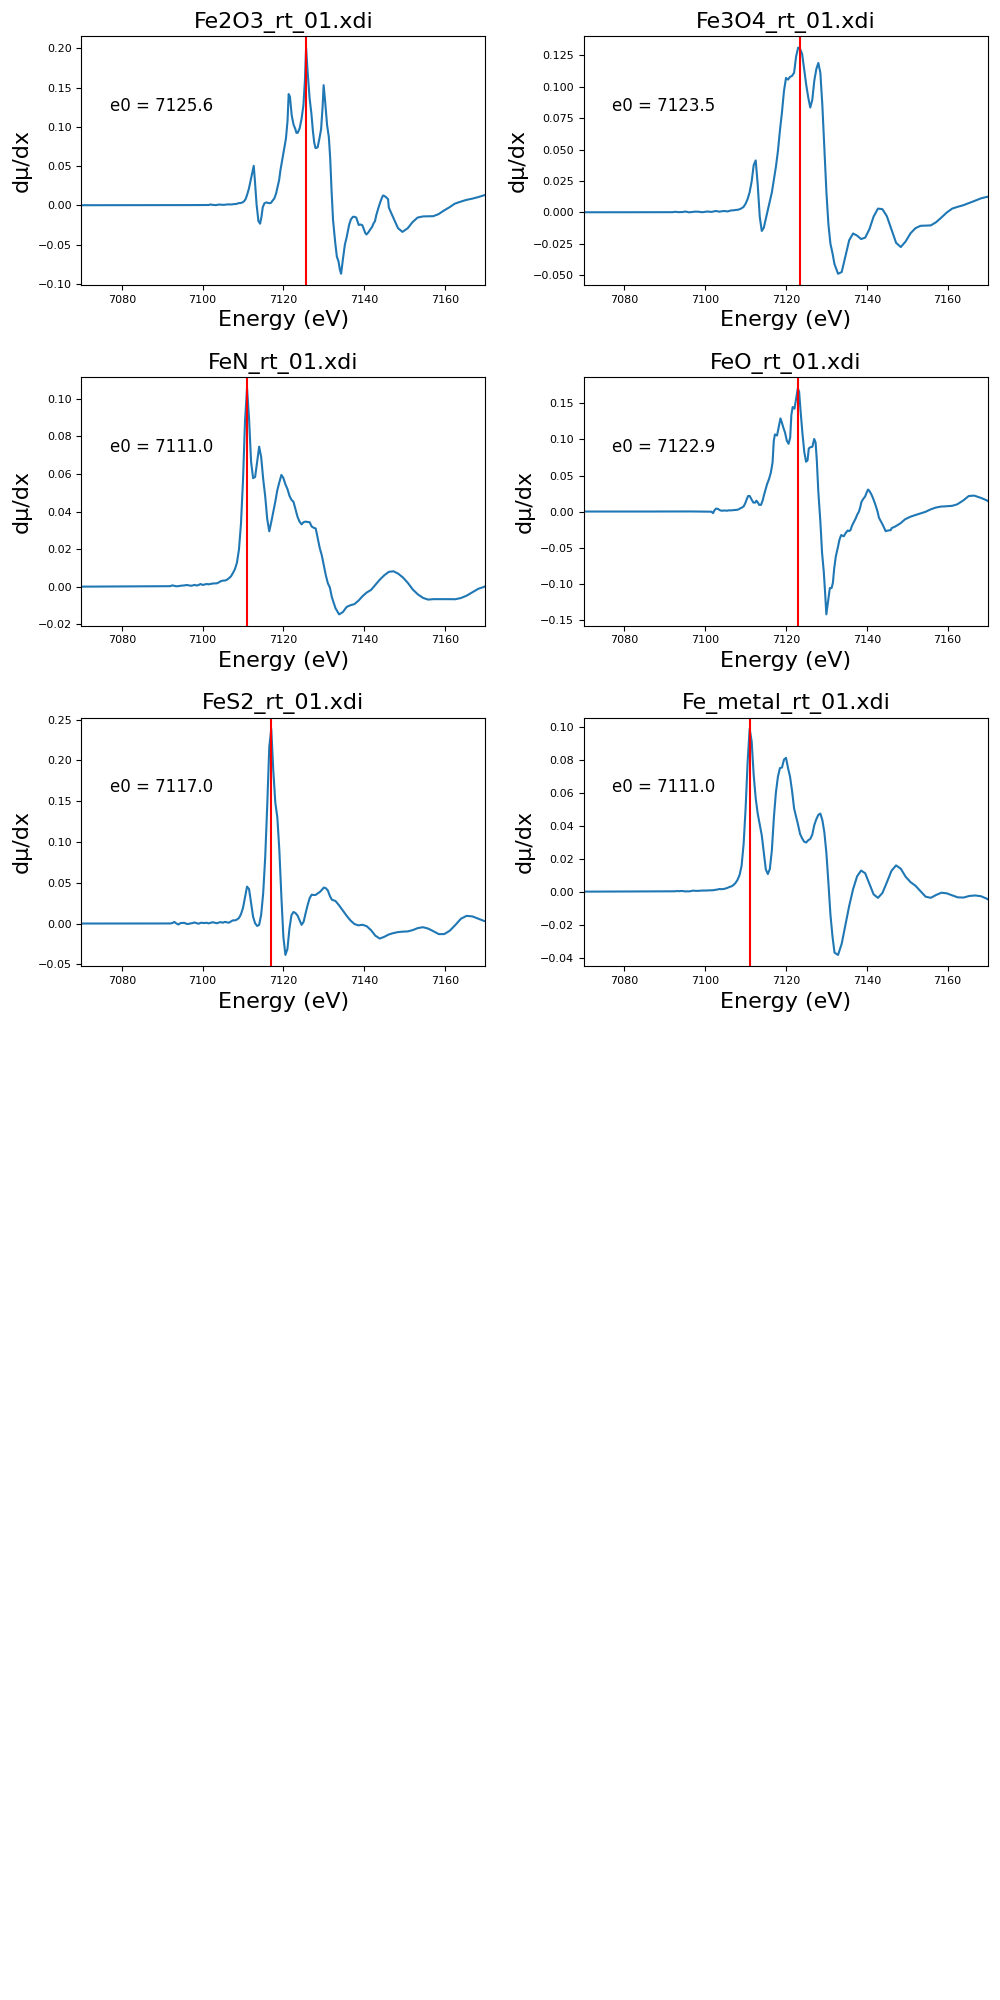

In [55]:
#Check each e0
plt.figure(figsize=(10,20))
plt.rcParams.update({'font.size': 8})

for i, group in enumerate(grp_list):   
    spec = group[1]
    plt.subplot(len(grp_list), 2, i+1)
    plt.plot(spec.energy, spec.dmude)
    plt.axvline(spec.e0, color='r')
    plt.annotate('e0 = '+str(round(spec.e0,1)),(0.07,0.7),xycoords='axes fraction', size=12)
    plt.xlim(7070, 7170)
    plt.xlabel('Energy (eV)', fontsize=16)
    plt.ylabel('d\u03BC/dx', fontsize=16)
    plt.title(group[0], fontsize=16)
plt.tight_layout(h_pad=2,w_pad=2)
plt.show()

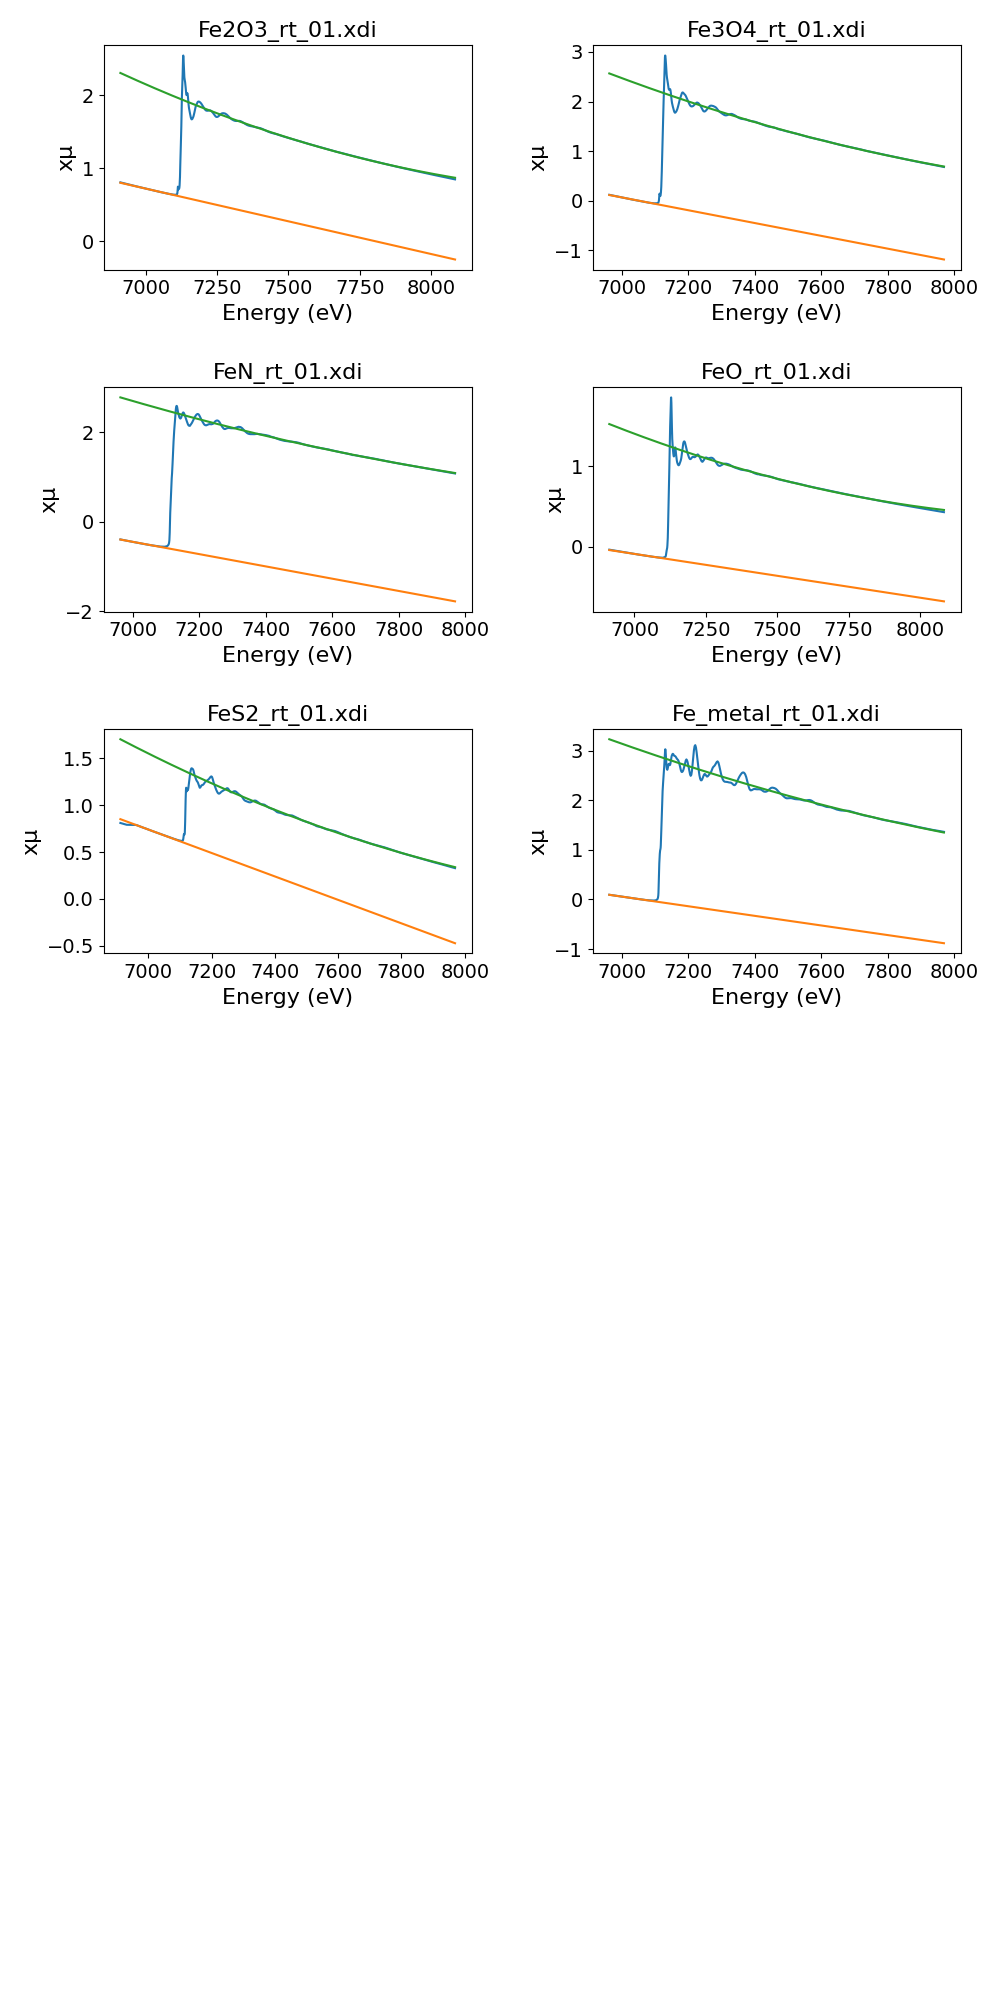

In [54]:
# Check pre- and post-edge lines
plt.figure(figsize=(10,20))
plt.rcParams.update({'font.size': 14})

for i, group in enumerate(grp_list):    
    spec = group[1]
    plt.subplot(len(grp_list), 2, i+1)
    plt.plot(spec.energy, spec.mutrans)
    plt.plot(spec.energy, spec.pre_edge)
    plt.plot(spec.energy, spec.post_edge)
    plt.xlabel('Energy (eV)', fontsize=16)
    plt.ylabel('x\u03BC', fontsize=16)
    plt.title(group[0], fontsize=16)
plt.tight_layout(h_pad=2,w_pad=2)
plt.show()

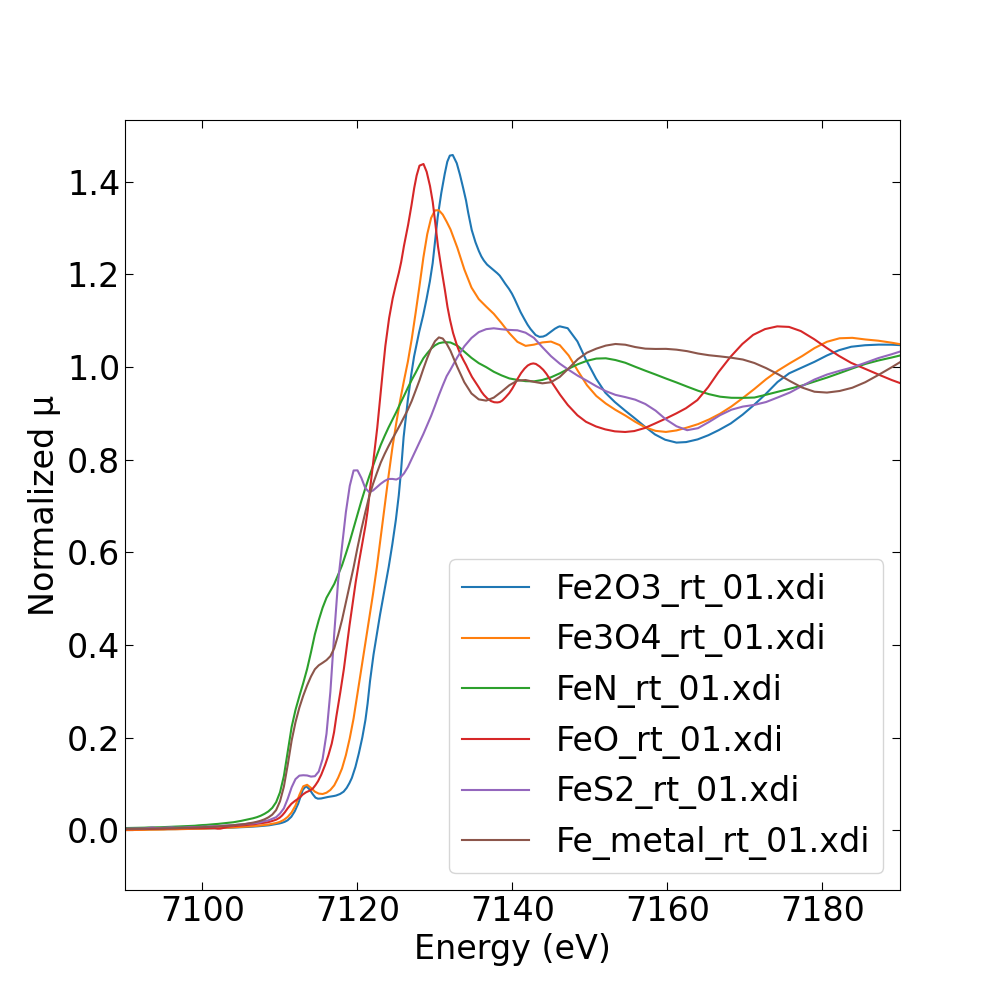

In [61]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 24})

for i, group in enumerate(grp_list):    
    spec = group[1]
    plt.plot(spec.energy, spec.flat, label=group[0])
    plt.legend(loc='lower right', ncol=1, prop={'size': 24})
    plt.tick_params(direction='in', top='True', right ='True', length=6)
    plt.xlim(7090, 7190)
    plt.xlabel('Energy (eV)', fontsize=24)
    plt.ylabel('Normalized \u03BC', fontsize=24)
plt.show()

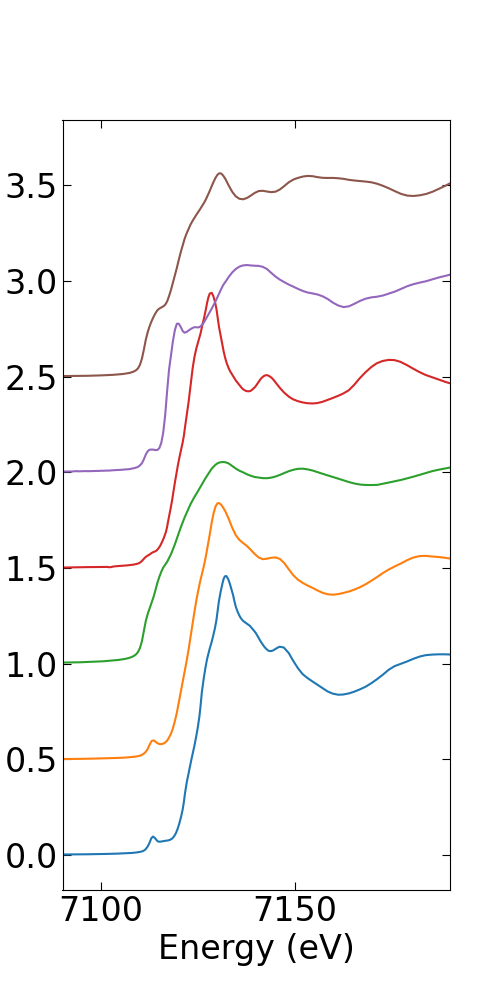

In [64]:
plt.figure(figsize=(5,10))
plt.rcParams.update({'font.size': 24})
c=0
for i, group in enumerate(grp_list):  
    spec = group[1]
    plt.plot(spec.energy, spec.flat+c, label=group[0])
    # plt.legend(loc='lower right', ncol=1, prop={'size': 24})
    plt.tick_params(direction='in', top='True', right ='True', length=6)
    plt.xlim(7090, 7190)
    plt.xlabel('Energy (eV)', fontsize=24)
    plt.ylabel('Normalized \u03BC', fontsize=24)
    c+=0.5
plt.show()